In [54]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain-openai

In [55]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Optional

In [56]:
class GraphState(TypedDict):
    question: Optional[str]
    classification: Optional[str]
    response: Optional[str]

In [57]:
graph = StateGraph(GraphState)

In [58]:
def query_csi_rag_docs(query: str) -> GraphState:
    pass


def classify_prompt(node: StateGraph) -> GraphState:
    pass


def call_csi_rag(node: StateGraph) -> GraphState:
    pass


def translate_eng_to_pl(state: GraphState) -> GraphState:
    pass


def translate_pl_to_eng(state: GraphState) -> GraphState:
    pass


def generate_validation(state: GraphState) -> GraphState:
    pass


def generate_rule(state: GraphState) -> GraphState:
    pass


def decide_code_gen_type(state: GraphState) -> str:
    return "generate_validation"


def decide_is_docs_query(state: GraphState) -> str:
    return "generate_validation"

In [59]:
graph.add_node("query_csi_rag_docs", query_csi_rag_docs)
graph.add_node("classify_prompt", classify_prompt)
graph.add_node("call_csi_rag", call_csi_rag)
graph.add_node("translate_pl_to_eng", translate_pl_to_eng)
graph.add_node("generate_validation", generate_validation)
graph.add_node("generate_rule", generate_rule)
graph.add_node("translate_eng_to_pl", translate_eng_to_pl)
graph.add_node("classify_code_gen", decide_code_gen_type)

In [60]:
graph.add_conditional_edges(
    "classify_code_gen",
    decide_code_gen_type,
    {
        "generate_validation": "generate_validation",
        "generate_rule": "generate_rule",
    }
)

graph.add_conditional_edges(
    "classify_prompt",
    decide_is_docs_query,
    {
        "translate_pl_to_eng": "translate_pl_to_eng",
        "call_csi_rag": "call_csi_rag"
    }
)

graph.add_conditional_edges(
    "generate_rule",
    query_csi_rag_docs,
    {
        "query_csi_rag_docs": "query_csi_rag_docs",
        "translate_eng_to_pl": "translate_eng_to_pl"
    },
)

In [61]:
graph.add_edge(START, "classify_prompt")
graph.add_edge("translate_pl_to_eng", "classify_code_gen")
graph.add_edge("generate_validation", "translate_eng_to_pl")
graph.add_edge("query_csi_rag_docs", "generate_rule")
graph.add_edge("translate_eng_to_pl", END)
graph.add_edge("call_csi_rag", END)

In [62]:
graph = graph.compile()

In [63]:
def draw_graph(graph):
    from IPython.display import Image, display
    try:
        display(Image(graph.get_graph().draw_mermaid_png()))
    except Exception:
        pass

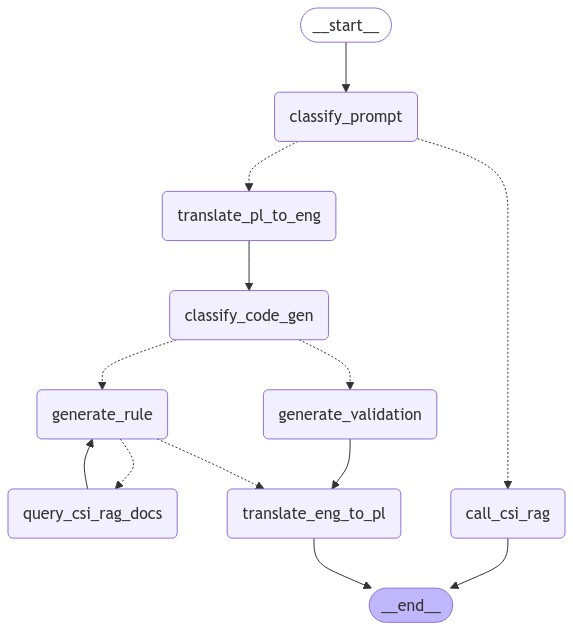

In [64]:
draw_graph(graph)